In [49]:
#CALIFORNIA HOUSE PREDICTION 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
import sweetviz as sv

C:\Users\Aadya\anaconda3\envs\ds\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Aadya\anaconda3\envs\ds\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [3]:
import sys
sys.version


'3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]'

In [4]:
import numpy as np
np.__version__


'1.26.4'

In [5]:
data=fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [7]:
df.shape

(20640, 8)

In [8]:
#independant data- used for training set 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [11]:
df['Target']=data.target
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [12]:
df.head()
#target column is added

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
report = sv.analyze(df)

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:02 -> (00:00 left)


In [14]:
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
!pip install geopy


In [16]:
#Data Preprocessing
#Feature engineering
from geopy.geocoders import Nominatim

In [17]:
geolocator=Nominatim(user_agent='geoapiExcercises', timeout=10) 
# takes value of longitude and latitude , checks the web and returns the value 

In [18]:
location = geolocator.reverse((37.88, -122.23))
location.address
#returns the address

'Grizzly Peak Boulevard, Oakland, Alameda County, California, 94720, United States'

In [19]:
address = geolocator.reverse((37.88, -122.23)).raw['address']
address


{'road': 'Grizzly Peak Boulevard',
 'city': 'Oakland',
 'county': 'Alameda County',
 'state': 'California',
 'ISO3166-2-lvl4': 'US-CA',
 'postcode': '94720',
 'country': 'United States',
 'country_code': 'us'}

In [21]:
from sklearn.cluster import KMeans

coords = df[["Latitude", "Longitude"]]
kmeans = KMeans(n_clusters=50, random_state=42)
df["location_cluster"] = kmeans.fit_predict(coords)



C:\Users\Aadya\anaconda3\envs\ds\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Aadya\anaconda3\envs\ds\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aadya\anaconda3\envs\ds\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Aadya\anaconda3\envs\ds\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^

In [ ]:
import pickle 

In [22]:
print(df["location_cluster"].head(10))


0    35
1    35
2    35
3    35
4    35
5    35
6    35
7    35
8    35
9    35
Name: location_cluster, dtype: int32


In [23]:
df["location_cluster"].nunique()


50

In [24]:
df["location_cluster"].value_counts().head()


location_cluster
16    2185
0     1364
19    1352
44    1307
4     1181
Name: count, dtype: int64

In [25]:
df[["location_cluster"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   location_cluster  20640 non-null  int32
dtypes: int32(1)
memory usage: 80.8 KB


In [27]:
df[["Latitude", "Longitude", "location_cluster"]].head(20)


,Latitude,Longitude,location_cluster
0,37.88,-122.23,35
1,37.86,-122.22,35
2,37.85,-122.24,35
3,37.85,-122.25,35
4,37.85,-122.25,35
5,37.85,-122.25,35
6,37.84,-122.25,35
7,37.84,-122.25,35
8,37.84,-122.26,35
9,37.84,-122.25,35


In [28]:
df[["Latitude", "Longitude", "location_cluster"]].tail(10)


,Latitude,Longitude,location_cluster
20630,39.29,-121.32,39
20631,39.33,-121.40,39
20632,39.26,-121.45,39
20633,39.19,-121.53,39
20634,39.27,-121.56,39
20635,39.48,-121.09,41
20636,39.49,-121.21,41
20637,39.43,-121.22,41
20638,39.43,-121.32,39
20639,39.37,-121.24,41


In [29]:
#add new features to the dataset 
# nothing to add — feature already in df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target,location_cluster
0,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700,23
1,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800,10
2,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001,14
3,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600,27
4,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000,36


In [32]:
df = df.drop(columns=["Latitude", "Longitude"], errors="ignore")

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,location_cluster
0,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,0.47700,23
1,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,0.45800,10
2,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,5.00001,14
3,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,2.18600,27
4,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,2.78000,36


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Target            20640 non-null  float64
 7   location_cluster  20640 non-null  int32  
dtypes: float64(7), int32(1)
memory usage: 1.2 MB


In [34]:
X = df.drop("Target", axis=1)
y = df["Target"]


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
#option 1 : SDG Classifier 
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(random_state=42)
model.fit(X_train, y_train)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [37]:
#option 2 : Random Forest 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = model.predict(X_test)



In [40]:
#RMSE for random forest 
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 0.5829723447654016


In [42]:
#RMSE for linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
lr_pred = lr.predict(X_test)

# Evaluate
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)

print("Linear Regression RMSE:", lr_rmse)



Linear Regression RMSE: 0.7821127843868725


In [43]:
#Linear Regression assumes a linear relationship between features and house prices, which limits its ability to capture complex spatial and 
#demographic patterns. Random Forest, being a non-linear ensemble model, achieved lower RMSE and was therefore selected as the final model.
# lower rmse-> better accuracy 

In [46]:
#Random forest tells which feature was most used , relied on and how much each feature contributed 

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


MedInc              0.545302
AveOccup            0.150781
HouseAge            0.072160
AveRooms            0.069722
location_cluster    0.068247
Population          0.047940
AveBedrms           0.045848
dtype: float64

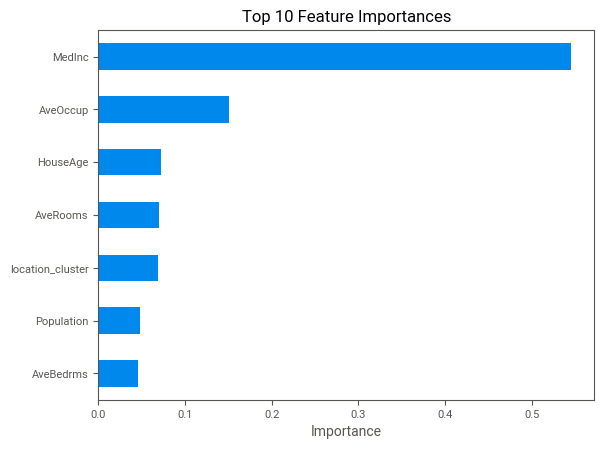

In [48]:
#Visualisation of the contribution of each parameter 

feature_importance.head(10).plot(kind="barh")
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


#The most influential features were median income, location cluster, and average number of rooms, indicating that both economic and
#geographic factors strongly affect housing prices.